## Imports

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, normalized_mutual_info_score, pairwise_distances
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, SpectralClustering, KMeans

# import os pacotes necessários

## Construindo o Dataset

In [15]:
dataset_path = './images/*.png'
images_filenames = glob.glob(dataset_path)

images_filenames = np.sort(images_filenames)

img_arry = []
for img_path in images_filenames:
  img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2GRAY)
  img_arry.append(img.flatten())

image_dataset = pd.DataFrame(img_arry)

print('shape:', image_dataset.shape)
image_dataset.head()

shape: (174, 16384)


,0,1,2,3,4,5,6,7,8,9,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,49,47,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
1,49,47,27,27,27,27,27,27,27,27,...,27,27,27,27,27,27,27,27,27,27
2,49,47,27,27,27,27,27,27,27,27,...,27,27,27,27,27,27,27,27,27,27
3,49,47,27,27,27,27,27,27,27,27,...,27,27,27,27,27,27,27,27,27,27
4,49,47,26,26,26,26,26,26,26,26,...,26,26,26,26,26,26,26,26,26,26


# Testando o PCA

In [16]:
# Aplique o PCA e selecione apenas 2 componentes, armazene na variável X_new
pca = PCA(n_components=2)
X_new = pca.fit_transform(image_dataset)
X_new = pd.DataFrame(X_new)
X_new

,0,1
0,3605.590664,-1154.826402
1,4881.610240,-1420.969591
2,5301.692030,-1653.479008
3,5259.107390,-1657.447487
4,5148.615984,-1667.675749
...,...,...
169,-1122.823225,435.647542
170,3.004277,391.167019
171,1239.210636,294.358189
172,2762.988283,589.846425


<Axes: xlabel='0', ylabel='1'>

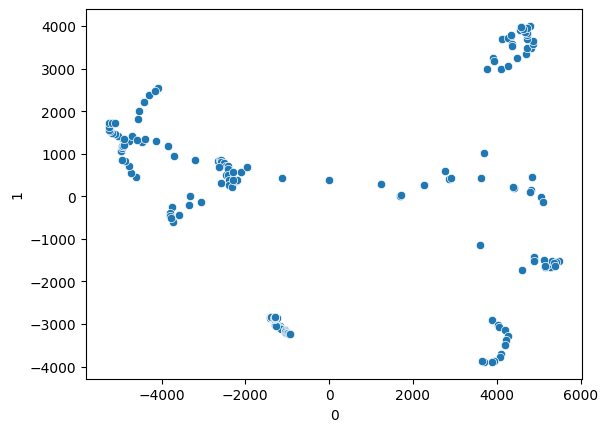

In [17]:
# plote um gráfico de dispersão para o X_new com os dois componentes
sns.scatterplot(data=X_new, x=X_new[0], y=X_new[1])

## Avaliando os modelos (n_clusters = 10)

In [18]:
def plot_images_by_cluster(images_filenames, y, cluster_idx):
  print(f'cluster {cluster_idx}')

  fig, ax = plt.subplots(1, len(images_filenames[y==cluster_idx]))
  i = 0
  for path in images_filenames[y==cluster_idx]:
    img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2GRAY)
    ax[i].imshow(img, cmap="gray")
    i = i + 1
  plt.show()

### K-Means

/media/rafael/OS/cesar/modelos-preditivos-kmeans-aglomerative-spectral/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(10, 2)
cluster 0


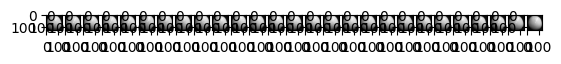

cluster 1


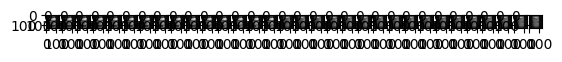

cluster 2


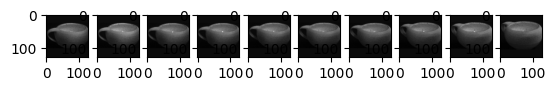

cluster 3


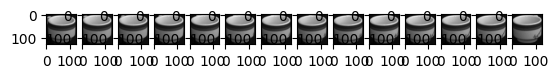

cluster 4


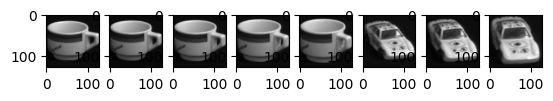

cluster 5


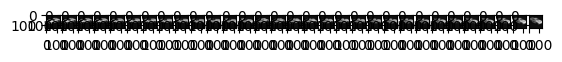

cluster 6


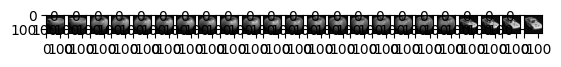

cluster 7


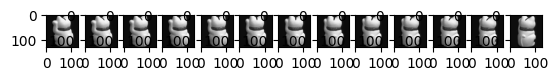

cluster 8


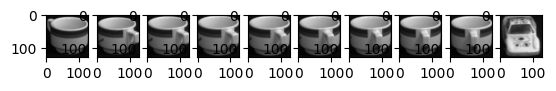

cluster 9


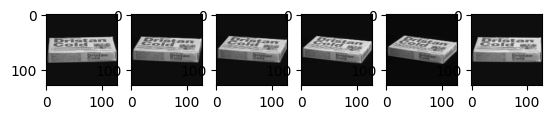

In [19]:
# treine o k-means o X_new
kmeans = KMeans(n_clusters=10).fit(X_new)

y_kmeans = kmeans.labels_

print(kmeans.cluster_centers_.shape)

for k in range(max(y_kmeans) + 1):
  plot_images_by_cluster(images_filenames, y_kmeans, k)

### Aglomerativo

cluster 0


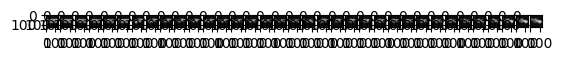

cluster 1


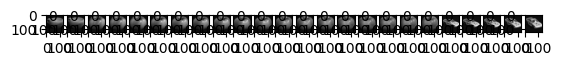

cluster 2


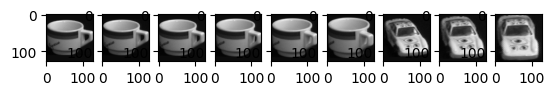

cluster 3


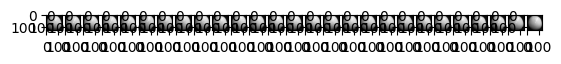

cluster 4


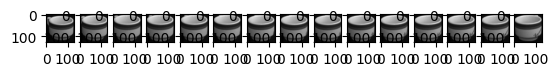

cluster 5


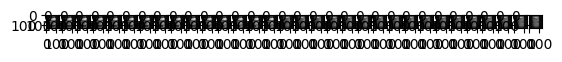

cluster 6


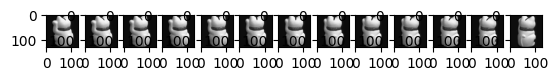

cluster 7


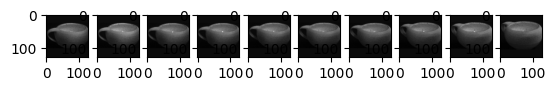

cluster 8


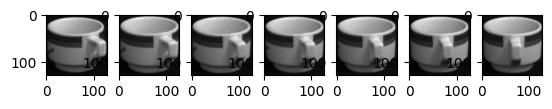

cluster 9


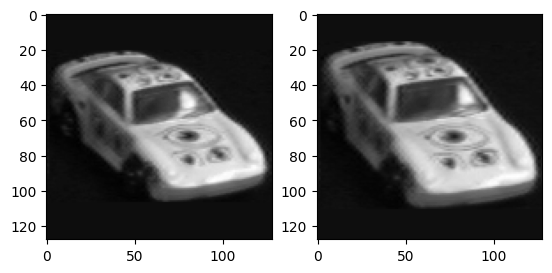

In [20]:
# treine o cluster aglomerativo com o X_new
agglomerative = AgglomerativeClustering(n_clusters=10).fit(X_new)

y_agglomerative = agglomerative.labels_

for k in range(max(y_agglomerative) + 1):
  plot_images_by_cluster(images_filenames, y_agglomerative, k)

### Spectral

/media/rafael/OS/cesar/modelos-preditivos-kmeans-aglomerative-spectral/venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


cluster 0


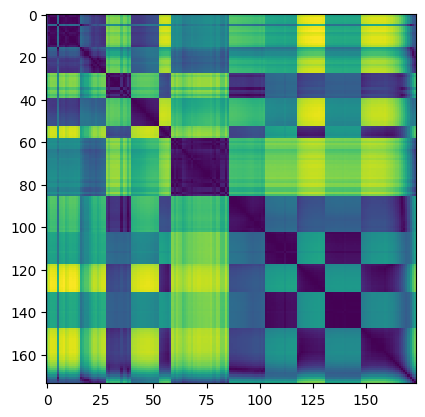

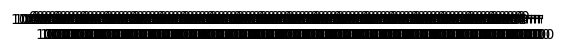

cluster 1


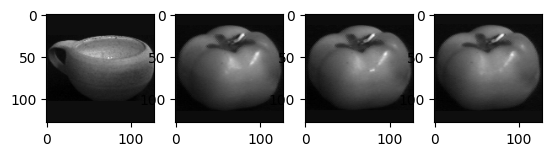

cluster 2


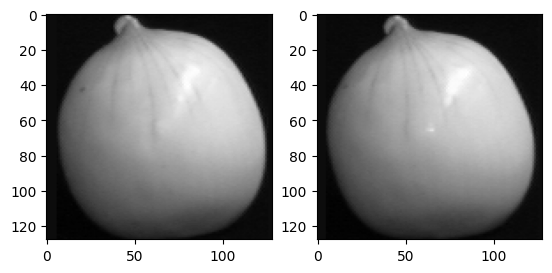

cluster 3


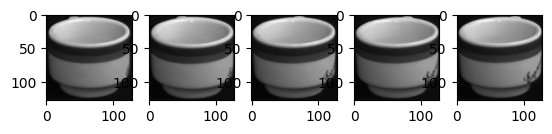

cluster 4


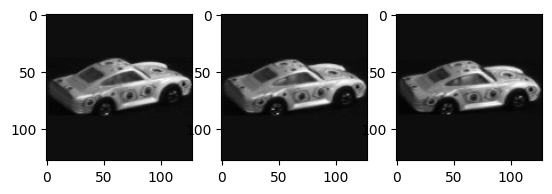

cluster 5


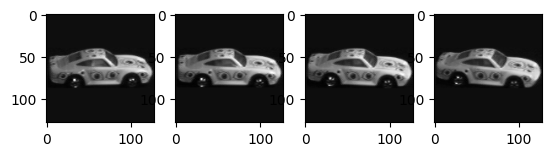

cluster 6


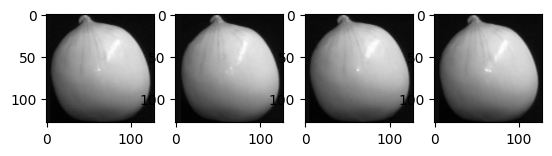

cluster 7


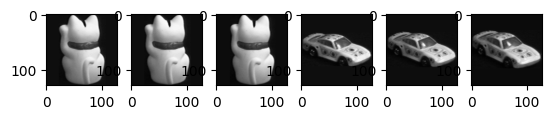

cluster 8


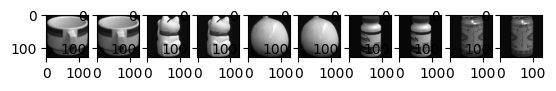

cluster 9


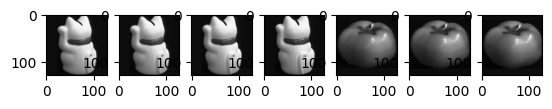

In [21]:
# treine o Spectral clustering com o X_new
p = pairwise_distances(X_new, metric='euclidean')
plt.imshow(p, interpolation='nearest')

spectral = SpectralClustering(n_clusters=10,affinity='precomputed_nearest_neighbors', n_neighbors=2).fit(p)

y_spectral = spectral.labels_

for k in range(max(y_spectral) + 1):
  plot_images_by_cluster(images_filenames, y_spectral, k)

## Análise dos Clusters

In [22]:
# calcule a silhueta para os modelos
sil_kmeans = silhouette_score(X_new, y_kmeans, metric='euclidean')
sil_agglomerative = silhouette_score(X_new,y_agglomerative, metric='euclidean')
sil_spectral = silhouette_score(X_new, y_spectral, metric='euclidean')

print('Silhueta kmeans', sil_kmeans)
print('Silhueta agglomerative', sil_agglomerative)
print('Silhueta spectral', sil_spectral)

print('\n')

y_true = [path.split('/')[2].split('__')[0] for path in images_filenames]

# calcule o NMI para os modelos
nmi_kmeans = normalized_mutual_info_score(y_true, y_kmeans)
nmi_agglomerative = normalized_mutual_info_score(y_true, y_agglomerative)
nmi_spectral =normalized_mutual_info_score(y_true, y_spectral)

print('NMI Kmeans: ', nmi_kmeans)
print('NMI Aglomerativo: ', nmi_agglomerative)
print('NMI Spectral: ', nmi_spectral)

Silhueta kmeans 0.7107923277915019
Silhueta agglomerative 0.7320306935298627
Silhueta spectral -0.4806848738655915


NMI Kmeans:  0.8339181612465216
NMI Aglomerativo:  0.8086665239362911
NMI Spectral:  0.2510694714930455


In [23]:
# comente os resultados obtidos

<p>O spectral por possuir uma silhueta negativa diz que existe choque entre os grupos, então o spectral é desconsiderado. O melhor modelo seria o KMeans por apresentar um NMI maior</p>

## Testando o LDA e o PCA

In [24]:
# considere o dataset (train.csv) Titanic disponível em https://www.kaggle.com/competitions/titanic/data?select=train.csv
data = pd.read_csv('./train.csv')
y_true = data['Survived']
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
tradutor = {'male': 1, 'female': 0}

data['Male'] = data['Sex'].apply(lambda x: tradutor[x])

In [26]:
# avalie a remoção de variáveis (tais como Name)
data = data.drop(['Name', 'Cabin','Ticket','Sex'],axis=1)
data.head()
# utilize a função data.info() para avaliar os dados faltantes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Embarked     889 non-null    object 
 8   Male         891 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 62.8+ KB


In [27]:
data['Age'] = data['Age'].fillna(data['Age'].mean())
data.dropna(inplace=True)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Age          889 non-null    float64
 4   SibSp        889 non-null    int64  
 5   Parch        889 non-null    int64  
 6   Fare         889 non-null    float64
 7   Embarked     889 non-null    object 
 8   Male         889 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 69.5+ KB


In [29]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Male'],
      dtype='object')

In [30]:
# aplique uma normalização dos dados (StandartScaler ou MinMaxScaler)
data = pd.get_dummies(data)
data


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.000000,1,0,7.2500,1,0,0,1
1,2,1,1,38.000000,1,0,71.2833,0,1,0,0
2,3,1,3,26.000000,0,0,7.9250,0,0,0,1
3,4,1,1,35.000000,1,0,53.1000,0,0,0,1
4,5,0,3,35.000000,0,0,8.0500,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,1,0,0,1
887,888,1,1,19.000000,0,0,30.0000,0,0,0,1
888,889,0,3,29.699118,1,2,23.4500,0,0,0,1
889,890,1,1,26.000000,0,0,30.0000,1,1,0,0


In [31]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [32]:
y_true = data['Survived']
x_data = data[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]
scaler = StandardScaler()
scaler.fit(x_data)
x_data = scaler.transform(x_data)

In [33]:
x_data = pd.DataFrame(x_data)
x_data

,0,1,2,3,4,5,6,7,8,9
0,-1.732505,0.825209,-0.590495,0.431350,-0.474326,-0.500240,0.735342,-0.482711,-0.307941,0.616794
1,-1.728611,-1.572211,0.643971,0.431350,-0.474326,0.788947,-1.359911,2.071634,-0.307941,-1.621287
2,-1.724718,0.825209,-0.281878,-0.475199,-0.474326,-0.486650,-1.359911,-0.482711,-0.307941,0.616794
3,-1.720825,-1.572211,0.412509,0.431350,-0.474326,0.422861,-1.359911,-0.482711,-0.307941,0.616794
4,-1.716931,0.825209,0.412509,-0.475199,-0.474326,-0.484133,0.735342,-0.482711,-0.307941,0.616794
...,...,...,...,...,...,...,...,...,...,...
884,1.716931,-0.373501,-0.204724,-0.475199,-0.474326,-0.384475,0.735342,-0.482711,-0.307941,0.616794
885,1.720825,-1.572211,-0.821957,-0.475199,-0.474326,-0.042213,-1.359911,-0.482711,-0.307941,0.616794
886,1.724718,0.825209,0.003524,0.431350,2.006119,-0.174084,-1.359911,-0.482711,-0.307941,0.616794
887,1.728611,-1.572211,-0.281878,-0.475199,-0.474326,-0.042213,0.735342,2.071634,-0.307941,-1.621287


In [34]:
pca = PCA(n_components=2)
X_new_PCA = pca.fit_transform(x_data,y_true)
X_new_PCA

array([[-1.44169576,  0.05669131],
       [ 3.29424098, -0.02463705],
       [-0.93471989,  0.11276387],
       ...,
       [-0.599747  ,  1.86779643],
       [ 2.36372588, -1.23161353],
       [-0.09423287, -2.34136726]])

In [35]:
clf = LinearDiscriminantAnalysis()
X_new_LDA = clf.fit_transform(x_data, y_true)
X_new_LDA

array([[-1.23385427e+00],
       [ 2.28262687e+00],
       [ 9.58418546e-01],
       [ 2.06050157e+00],
       [-1.38273402e+00],
       [-9.81032812e-01],
       [-3.57804299e-01],
       [-1.13294830e+00],
       [ 8.03335659e-01],
       [ 2.10733789e+00],
       [ 1.27564267e+00],
       [ 1.63063255e+00],
       [-1.00995124e+00],
       [-1.96236785e+00],
       [ 1.25683543e+00],
       [ 9.70717647e-01],
       [-1.02594904e+00],
       [-5.22646580e-01],
       [ 6.74509915e-01],
       [ 1.14138969e+00],
       [-6.38447026e-01],
       [-6.29222826e-01],
       [ 1.50217550e+00],
       [ 2.68807726e-01],
       [ 8.36902195e-01],
       [ 1.81153112e-01],
       [-9.76233851e-01],
       [ 1.13824344e-01],
       [ 1.13737155e+00],
       [-1.25008876e+00],
       [ 2.36686441e-01],
       [ 2.58076187e+00],
       [ 1.13741308e+00],
       [-1.42607052e+00],
       [ 4.27651068e-01],
       [-2.30995964e-01],
       [-9.75736121e-01],
       [-1.03354547e+00],
       [ 8.2

In [36]:
# aplique o LDA e o PCA (2 componentes) considerando o y_true

### Treinamento dos modelos

In [37]:
# escolha um X_new para treinamento dos modelos
#PCA
y_kmeans = KMeans(n_clusters=2).fit(X_new_PCA).labels_
y_spectral = SpectralClustering(n_clusters=2).fit(X_new_PCA).labels_
y_agglomerative = AgglomerativeClustering(n_clusters=2).fit(X_new_PCA).labels_

/media/rafael/OS/cesar/modelos-preditivos-kmeans-aglomerative-spectral/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [38]:
#LDA
# y_kmeans = KMeans(n_clusters=2).fit(X_new_LDA).labels_
# y_spectral = SpectralClustering(n_clusters=2).fit(X_new_LDA).labels_
# y_agglomerative = AgglomerativeClustering(n_clusters=2).fit(X_new_LDA).labels_

### Análise de Clusters

In [39]:
# calcule a silhueta para os modelos
sil_kmeans = silhouette_score(X_new_PCA, y_kmeans, metric='euclidean')
sil_agglomerative = silhouette_score(X_new_PCA,y_agglomerative, metric='euclidean')
sil_spectral = silhouette_score(X_new_PCA, y_spectral, metric='euclidean')

print('Silhueta kmeans', sil_kmeans)
print('Silhueta agglomerative', sil_agglomerative)
print('Silhueta spectral', sil_spectral)

print('\n')

# calcule o NMI para os modelos
nmi_kmeans = normalized_mutual_info_score(y_true, y_kmeans)
nmi_agglomerative = normalized_mutual_info_score(y_true, y_agglomerative)
nmi_spectral =normalized_mutual_info_score(y_true, y_spectral)

print('NMI Kmeans: ', nmi_kmeans)
print('NMI Aglomerativo: ', nmi_agglomerative)
print('NMI Spectral: ', nmi_spectral)

Silhueta kmeans 0.4742153278176375
Silhueta agglomerative 0.4022140931475268
Silhueta spectral 0.6593106293381786


NMI Kmeans:  0.0445274054593213
NMI Aglomerativo:  0.007116013521694387
NMI Spectral:  0.009457937571959051


In [40]:
# comente os resultados obtidos
#LDA
# Silhueta kmeans 0.683237420241674
# Silhueta agglomerative 0.6739675394329712
# Silhueta spectral 0.6817817698531141


# NMI Kmeans:  0.2433321952710609
# NMI Aglomerativo:  0.25668627675425254
# NMI Spectral:  0.25286631738430426

#PCA
# Silhueta kmeans 0.4742153278176382
# Silhueta agglomerative 0.40221409314753
# Silhueta spectral 0.6593106293381789


# NMI Kmeans:  0.0445274054593213
# NMI Aglomerativo:  0.007116013521694387
# NMI Spectral:  0.009457937571959051


# escolheria por utilizar o LDA já que a silhueta apresenta valores superiores e principalmente por conta no NMI, pelos valores serem superiores comparados ao PCA. Metodo de treinamento (spectral ou Kmeans)